<a href="https://colab.research.google.com/github/evakorsunova/evakorsunova-DataScience-GenAI-Final-Submissions/blob/main/Asynchronous_tasks/2_06_EDA_with_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of the Titanic Dataset

###Step 1: Downloading the files


Asking Google Gemini to add a general code for file upload and importing some useful packages for later on analysis.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading and looking at the dataframe:

In [3]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Firstly, it can be seen that cabin already has many missing values, so it is best to analyze the occurence of missing values.


In [4]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Seems like the age and cabin columns are with the most missing values. Hence, we can look at how big the percentage is.

*With titanic_df, can you show what percentage of entries had values missing and then cut it down to only age column, cabin and embarked*

In [5]:
missing_percentage = (titanic_df.isnull().sum() / len(titanic_df)) * 100
print(missing_percentage[['Age', 'Cabin', 'Embarked']])

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


Hmm, looks like the cabin values are mostly missing, which makes it hard for analysis, best to disregard. But whereas embarked, we can look at those two entries and then delete.

In [8]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
titanic_df.dropna(subset=['Embarked'], inplace=True)

Now, we can also drop columns that are not as needed, either too unique for analysis or mostly useless.

In [12]:
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis= inplace = True)
titanic_df.info()

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Now, we can try to fill in the missing age columns by maybe considering the average per class. Deleting these values would be two detrimental.

In [15]:
titanic_df['Age'] = titanic_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Great, now we can finally look at trends. Let us see a correlation plot to see which values are the most related.

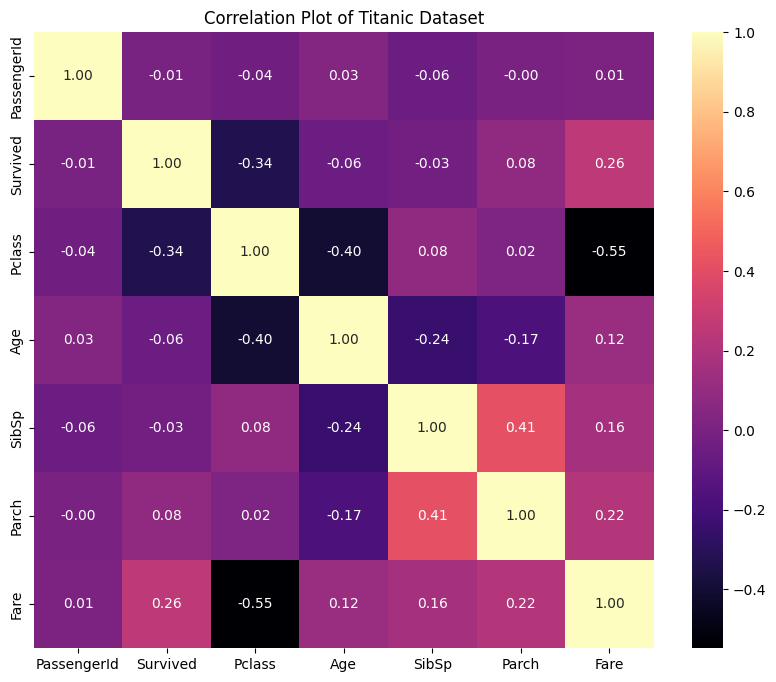

In [17]:
correlation_matrix = titanic_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Plot of Titanic Dataset')
plt.show()

In [18]:
print(correlation_matrix['Survived'])

PassengerId   -0.005028
Survived       1.000000
Pclass        -0.335549
Age           -0.055347
SibSp         -0.034040
Parch          0.083151
Fare           0.255290
Name: Survived, dtype: float64


It seems that passenger class, and fare had the most correlation to whether the passenger survived or not - logical. Let's look further.

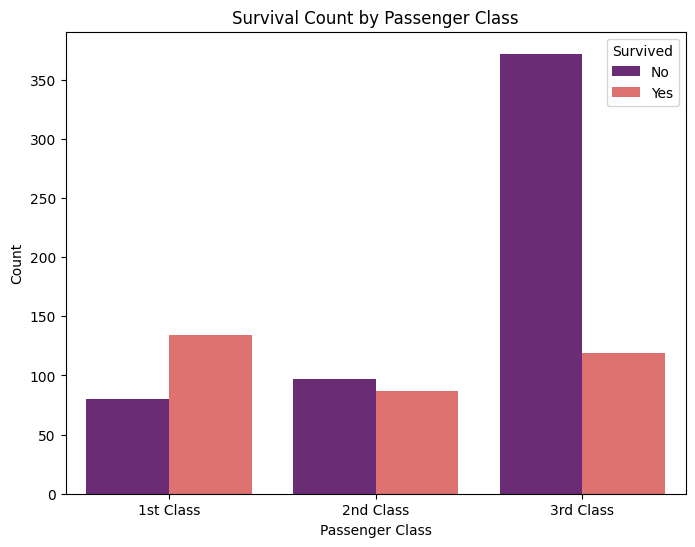

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette='magma')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


/tmp/ipython-input-2464903100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titanic_df, x='Survived', y='Fare', palette='magma')


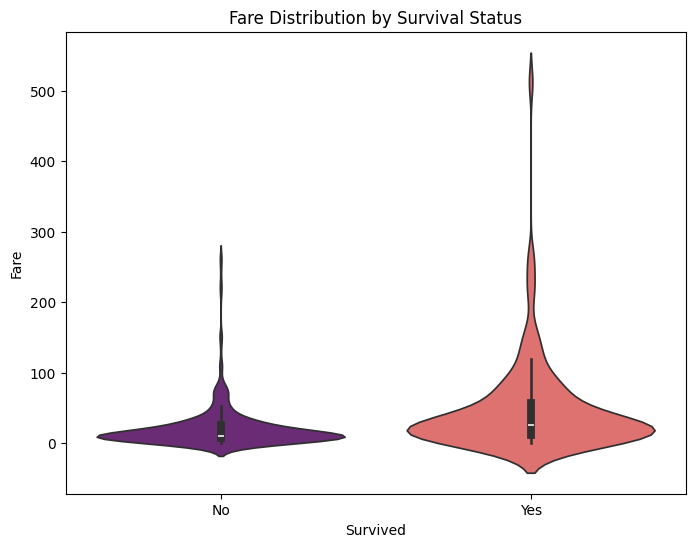

In [21]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=titanic_df, x='Survived', y='Fare', palette='magma')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()